# Feature Representation

---

## Introduction

Feature representation is the process of transforming raw data into a structured format that machine learning models can understand. Well-represented features can improve model accuracy and generalization.

---


**1. Direct Pixel Values (Basic Representation)**

Image data can be represented as raw pixel values, but this is generally not the best approach for most models. Here's how you load an image and convert it into numerical data:

In [1]:
from PIL import Image
import numpy as np

# Load an image
image = Image.open('/content/drive/MyDrive/Trainning/tumor-ex.jpg').convert('RGB')

# Resize to a fixed size (e.g., 128x128)
image = image.resize((128, 128))

# Convert to numpy array
image_array = np.array(image)

print("Image Shape:", image_array.shape)  # Output: (128, 128, 3)


Image Shape: (128, 128, 3)


**2. Handcrafted Feature Extraction**

2.1. Histogram od Orientation Gradients (HOG)

HOG captures gradient information to represent the shape and structure in an image.

**How Histogram of Oriented Gradients (HOG) Works:**
1. Gradient Computation:
   First, the image is divided into small cells (e.g., 8x8 pixels). For each pixel within the cell, the gradient magnitude and direction are computed. This measures the change in intensity from pixel to pixel.

2. Orientation Binning:
   The gradient directions within each cell are quantized into a set of discrete orientations (e.g., 9 bins covering 0° to 180°). The magnitude of the gradient is then added to the appropriate bin based on the direction of the gradient.

3. Block Normalization:
   To improve robustness to lighting variations, adjacent cells are grouped into blocks (e.g., 2x2 cells), and the histogram of each block is normalized. This step helps to reduce the effect of lighting changes or shadows.

4. Feature Vector:
   The normalized histograms from all blocks are concatenated into a feature vector that represents the image. This vector captures the shape and appearance of the object in the image.


Read for more details https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

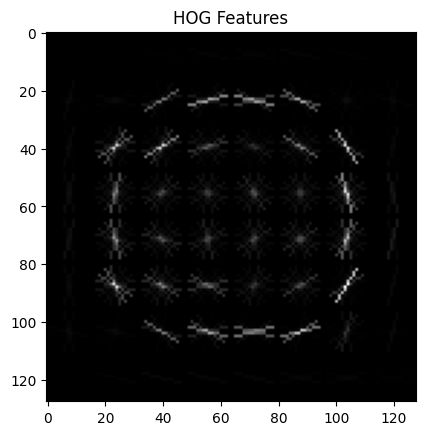

HOG Feature Vector Length: 512


In [2]:
from skimage.feature import hog
import matplotlib.pyplot as plt
# Assuming `image_array` is your input image
features, hog_image = hog(
    image_array,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1  # Use this for RGB images; for grayscale images, set to None.
)

# Display HOG image
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.show()

print("HOG Feature Vector Length:", len(features))

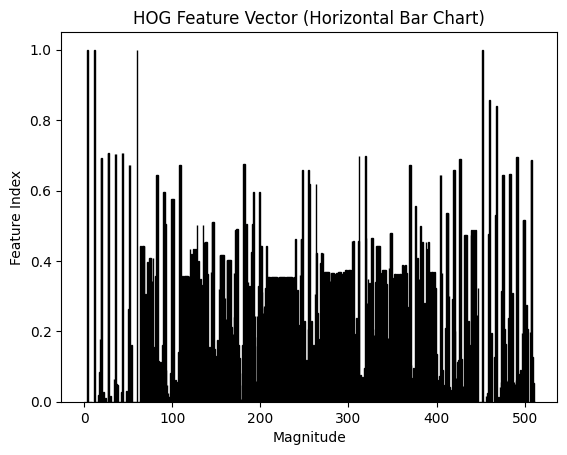

In [3]:
# Indices for horizontal axis
indices = np.arange(len(features))

# Plot horizontal bar chart
plt.bar(indices, features, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel("Magnitude")
plt.ylabel("Feature Index")
plt.title("HOG Feature Vector (Horizontal Bar Chart)")

# Show the plot
plt.show()

2.2 Color Histograms

Color histograms represent the distribution of colors in an image.

In [4]:
# Compute color histograms for each channel
color_histogram = []
for i in range(3):  # RGB channels
    hist, bins = np.histogram(image_array[:, :, i], bins=256, range=(0, 256))
    color_histogram.append(hist)

# Concatenate histograms
color_features = np.concatenate(color_histogram)

print("Color Features Length:", len(color_features))

Color Features Length: 768


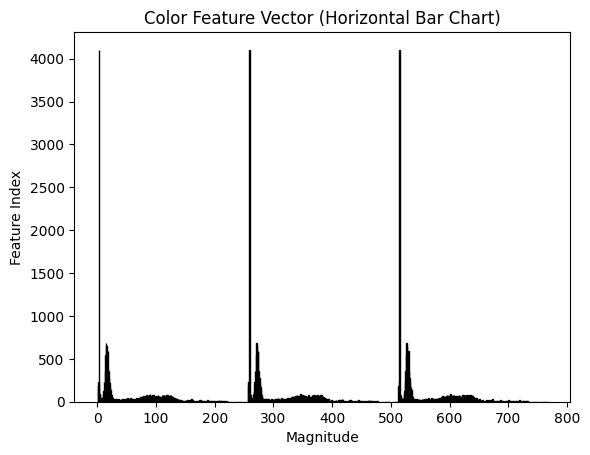

In [5]:
# Indices for horizontal axis
indices = np.arange(len(color_features))

# Plot horizontal bar chart
plt.bar(indices, color_features, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel("Magnitude")
plt.ylabel("Feature Index")
plt.title("Color Feature Vector (Horizontal Bar Chart)")

# Show the plot
plt.show()

**3. Deep Feature Extraction (Pretrained Models)**

Use pretrained deep learning models (e.g., ResNet, VGG) to extract high-level features from images.

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50

# Load a pretrained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Transform the image for the model
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Extract features from the last fully connected layer
with torch.no_grad():
    features = model(image_tensor)

print("Extracted Features Shape:", features.shape)  # Output: (1, 1000)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 78.8MB/s]


Extracted Features Shape: torch.Size([1, 1000])


**Visualize Intermediate Features**

You can visualize features from intermediate layers to understand what the network is learning.

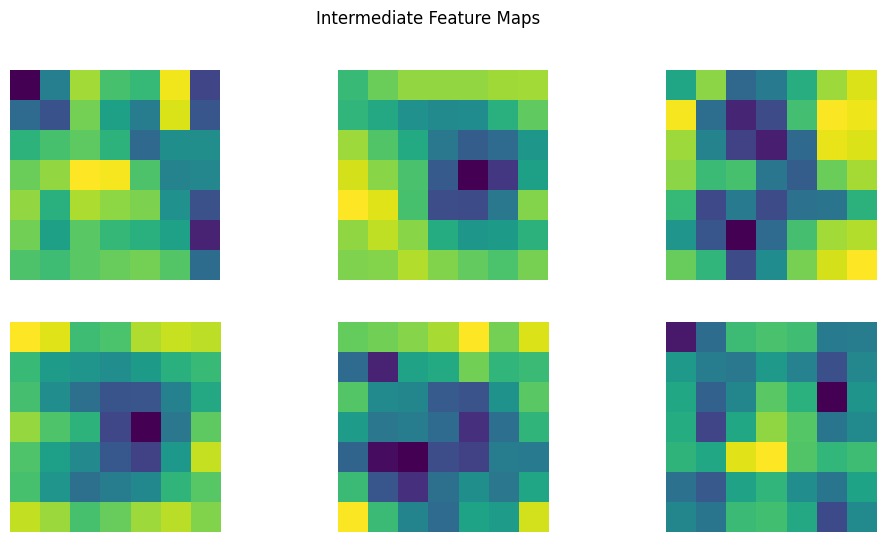

In [ ]:
# Hook to extract features from an intermediate layer
intermediate_layer = model.layer4[1].conv2

def hook(module, input, output):
    global intermediate_features
    intermediate_features = output

hook_handle = intermediate_layer.register_forward_hook(hook)

# Forward pass
with torch.no_grad():
    _ = model(image_tensor)

hook_handle.remove()  # Remove the hook after extraction

# Visualize features
feature_map = intermediate_features.squeeze(0).cpu().numpy()
plt.figure(figsize=(12, 6))
for i in range(6):  # Display the first 6 feature maps
    plt.subplot(2, 3, i + 1)
    plt.imshow(feature_map[i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Intermediate Feature Maps")
plt.show()

**4. Dimensionality Reduction**

Since deep features often have high dimensions, techniques like PCA or t-SNE can reduce the dimensionality for visualization or further processing.

PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Simulate multiple samples (e.g., 100 samples with 10 features)
features = np.random.rand(100, 10)  # Replace with your actual dataset

# Check the shape of features (should be more than one sample)
print("Features shape:", features.shape)

# Apply PCA with n_components (can be less than the number of features)
pca = PCA(n_components=2)  # You can adjust this depending on your feature size
reduced_features = pca.fit_transform(features)

print("Reduced Features Shape:", reduced_features.shape)

Features shape: (100, 10)
Reduced Features Shape: (100, 2)


**5. Local Binary Pattern**


**How Local Binary Pattern (LBP) Works:**
1. Neighborhood Comparison:
   For each pixel in the image (excluding borders), its 8 surrounding pixels are compared to the central pixel. These 8 surrounding pixels form a 3x3 neighborhood.

2. Binary Code Generation:
   The value of each surrounding pixel is compared to the center pixel's value:

   - If the surrounding pixel's value is greater than or equal to the center pixel, it is assigned a value of 1.
   - If the surrounding pixel's value is less than the center pixel, it is assigned a value of 0.
   This comparison results in an 8-bit binary number, where each bit represents one neighboring pixel.

3. Binary Pattern Conversion:
   The 8 binary values are combined into a single 8-bit number, which is converted to a decimal value. This resulting value represents the Local Binary Pattern for that pixel.

4. LBP Image:
  After computing the LBP for every pixel in the image, the image is replaced with its LBP values, which capture texture patterns based on local pixel intensity variations.

5. Histogram of LBP:
   To summarize the texture information, a histogram of the LBP values is computed for the entire image or for smaller regions (e.g., in windows or blocks). This histogram is then used as a feature vector for classification or further analysis.


Read for more detail : https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

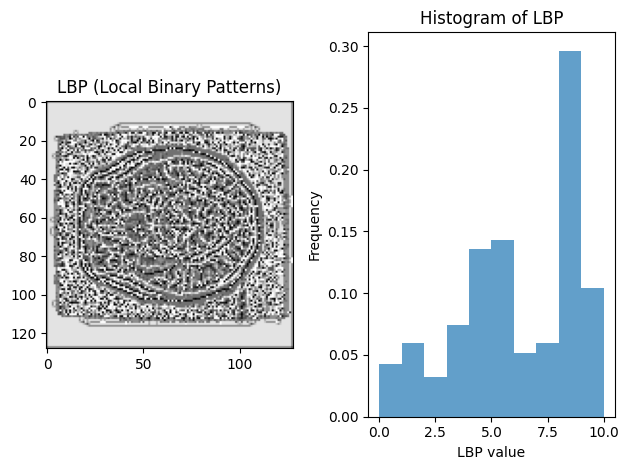

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

# Convert image to grayscale
image_array_gray = rgb2gray(image_array)

# Compute the LBP
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(image_array_gray, n_points, radius, method='uniform')

# Plot the LBP image
plt.subplot(1, 2, 1)
plt.imshow(lbp, cmap='gray')
plt.title('LBP (Local Binary Patterns)')

# Plot the histogram of the LBP values
plt.subplot(1, 2, 2)
plt.hist(lbp.ravel(), bins=range(0, int(lbp.max()) + 2), range=(0, lbp.max() + 1), density=True, alpha=0.7)
plt.title('Histogram of LBP')
plt.xlabel('LBP value')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

**6. Bag of Visual Words (BoVW)**

The Bag of Words (BoW) is a popular and simple technique used in natural language processing (NLP) and computer vision to represent text or images as numerical features. It ignores the grammar, word order, and structure of the text or image, focusing only on the occurrence of words or features.

In computer vision, the BoW model is used for image classification. Here, instead of words, the "words" are local image features (such as SIFT, SURF, or ORB features).

Steps for Image BoW:
1. Feature Extraction: Local image features (such as keypoints) are detected in
   the image using feature detectors (e.g., SIFT).
2. Vocabulary Creation: A visual vocabulary is built using clustering  
   techniques (e.g., k-means) on the local features from a collection of images. The centroids of the clusters become the "words" in the visual vocabulary.
3. Vectorization: Each image is represented as a histogram of visual words. The
   histogram counts how often each visual word appears in the image.


Example:
For an image, you might extract features like keypoints (points of interest) from different regions of the image. Then, using clustering, you build a vocabulary of "visual words." Each image can then be represented by a histogram of visual word occurrences.


Read more aout SIFT : https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

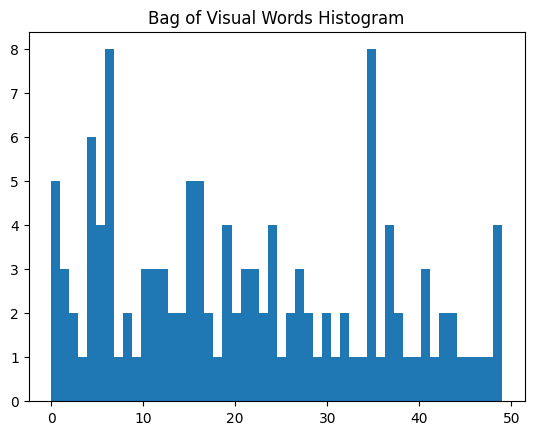

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image_array, None)

# Cluster the descriptors using KMeans (Bag of Visual Words)
kmeans = KMeans(n_clusters=50)
kmeans.fit(descriptors)

# Visualize the bag of words
plt.hist(kmeans.labels_, bins=50)
plt.title('Bag of Visual Words Histogram')
plt.show()